**Exploratory Data Analysis**

In [4]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
#df=pd.read_csv('/content/drive/MyDrive/Participants_Data_WSMLC/train.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


**Plotting the data**

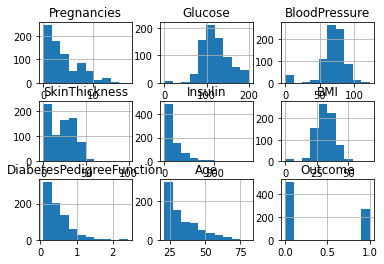

In [5]:
from matplotlib import pyplot as plt
df.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

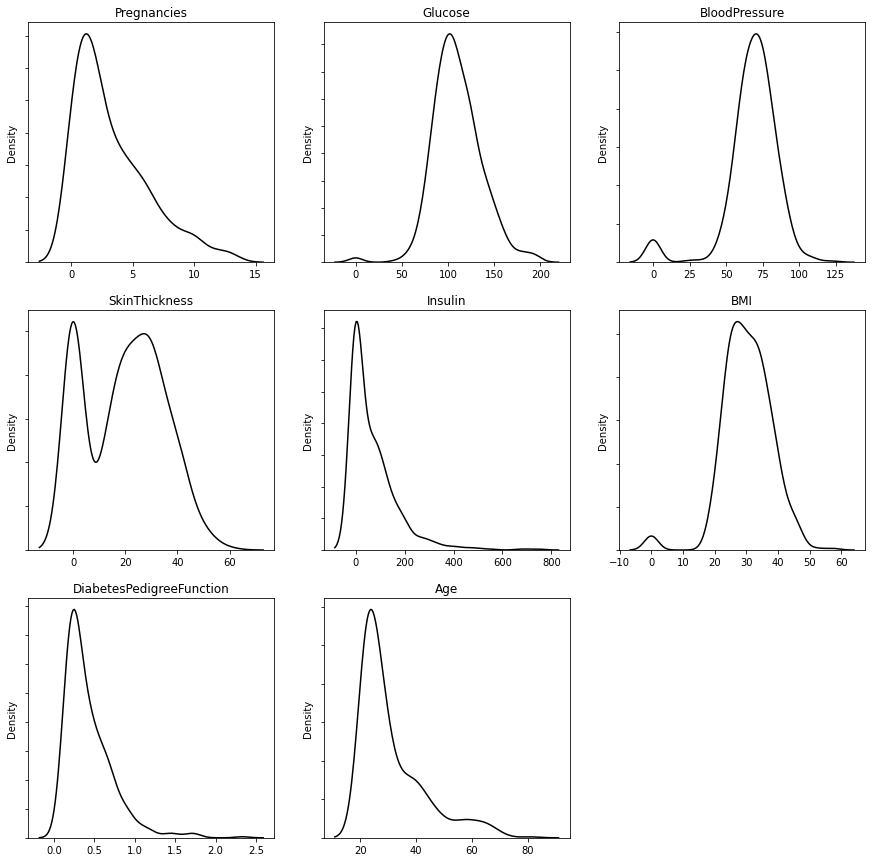

In [6]:
import seaborn as sns
plt.subplots(3,3,figsize=(15,15))
#plot a density plot for each variable
for idx,col in enumerate(df.columns):
  ax=plt.subplot(3,3,idx+1)
  ax.yaxis.set_ticklabels([])
  sns.distplot(df.loc[df.Outcome==0][col],hist=False,axlabel=False,
               kde_kws={'linestyle':'-','color':'black','label':'diabates'}
               )
  ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)
plt.show()

**Data Preprocessing**

In [ ]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [ ]:
print(df.describe())

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


In [ ]:
import numpy as np
df['Glucose']=df['Glucose'].replace(0,np.nan)
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)
df['Insulin']=df['Insulin'].replace(0,np.nan)
df['BMI']=df['BMI'].replace(0,np.nan)

In [ ]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

**Data Standardization**

In [ ]:
from sklearn import preprocessing
df_scaled=preprocessing.scale(df)
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled['Outcome']=df['Outcome']
df=df_scaled

**Splitting the training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x=df.loc[:,df.columns!='Outcome']
y=df.loc[:,'Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=None)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
test_size=0.2)
print(x_train.shape)
print(x_train)
print(x_test)

(491, 8)
     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
442     0.046014 -0.154088  ...                 -0.730495 -0.786286
529    -1.141852 -0.351352  ...                  0.568156 -0.190672
39      0.046014 -0.351352  ...                  2.772843  1.936522
623    -1.141852 -0.910266  ...                 -0.377141 -1.041549
558     2.124780 -0.614370  ...                 -1.044587  0.745293
..           ...       ...  ...                       ...       ...
739    -0.844885 -0.647248  ...                 -0.540228  0.745293
8      -0.547919  2.476096  ...                 -0.947944  1.681259
263    -0.250952  0.667844  ...                 -0.821099  2.532136
586     1.233880  0.700722  ...                 -1.035527  0.660206
45     -1.141852  1.917182  ...                  4.291962 -0.701198

[491 rows x 8 columns]
     Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
527    -0.250952 -0.186965  ...                 -1.101970 -0.786286
72      2.71871

**Model Building**

In [ ]:
from keras.models import Sequential
model=Sequential()
from keras.layers import Dense
# Add the first hidden layer
model.add(Dense(64, activation='relu', input_dim=8))
# Add the second hidden layer
model.add(Dense(32, activation='relu'))
# Add the third hidden layer
model.add(Dense(16, activation='relu'))
# Add the fourth hidden layer
model.add(Dense(8, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))


**Model Compilation**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy'])

**Model Training**

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=200)

Epoch 1/200
491/491 [==============================] - 4s 4ms/step - loss: 0.5354 - accuracy: 0.7251
Epoch 2/200
491/491 [==============================] - 1s 2ms/step - loss: 0.4658 - accuracy: 0.7597
Epoch 3/200
491/491 [==============================] - 1s 2ms/step - loss: 0.4477 - accuracy: 0.7699
Epoch 4/200
491/491 [==============================] - 1s 2ms/step - loss: 0.4420 - accuracy: 0.7699
Epoch 5/200
491/491 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.7841
Epoch 6/200
491/491 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.7923
Epoch 7/200
491/491 [==============================] - 1s 2ms/step - loss: 0.4087 - accuracy: 0.7963
Epoch 8/200
491/491 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8045
Epoch 9/200
491/491 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8126
Epoch 10/200
491/491 [==============================] - 1s 2ms/step - loss: 0.3748 - accura

**Result Analysis by testing the accuracy**

In [ ]:
scores = model.evaluate(x_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

16/16 [==============================] - 0s 2ms/step - loss: 1.3680e-05 - accuracy: 1.0000
Training Accuracy: 100.00%

5/5 [==============================] - 0s 4ms/step - loss: 5.0807 - accuracy: 0.7013
Testing Accuracy: 70.13%



**ROC Curve**

Text(0, 0.5, 'True Positive Rate')

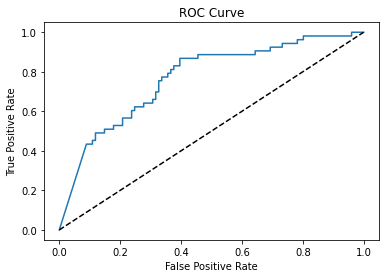

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_test_pred_probs = model.predict(x_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Testing Prediction**

70.12987012987013


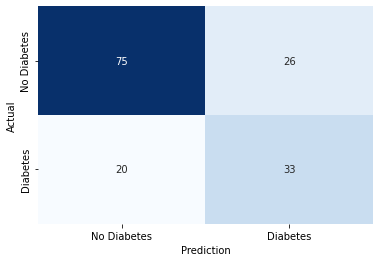

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = model.predict(x_test)
y_test_pred=y_test_pred.flatten()
y_test_pred = np.where(y_test_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(cm, annot=True,
                 xticklabels=['No Diabetes','Diabetes'],
                 yticklabels=['No Diabetes','Diabetes'],
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

**Custom Prediction**

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
print(x_test.iloc[0:1])
z=std.fit_transform(np.array([1,103,30,38,83,43.3,0.183,33]).reshape(-1,1))
z=np.reshape(z,(1,8))
print(z)
# -0.250952  0.141808  ...                  0.701041 -0.531023

y_test_pred = model.predict(z)
y_test_pred=y_test_pred.flatten()
y_pred = np.where(y_test_pred > 0.5, 1, 0)
print(y_pred)

    Pregnancies   Glucose  ...  DiabetesPedigreeFunction       Age
20    -0.250952  0.141808  ...                  0.701041 -0.531023

[1 rows x 8 columns]
[[-1.20076967  1.82822428 -0.33958511 -0.10201696  1.2343039   0.05537194
  -1.22503132 -0.25049706]]
[1]
